# Play Store App Analysis - By Prateek Dutta
#Google


While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

This information is scraped from the Google Play Store. This app information would not be available without it.

Tools & Techniques:-

Python[Language]

Numpy, Pandas, Matplotlib, Seaborn, Ploty Express [Libraries]

Data Cleaning

In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [4]:
cd/gdrive/MyDrive/Play Store App analysis/

/gdrive/MyDrive/Play Store App analysis


In [5]:
ls

googleplaystore.csv  googleplaystore_user_reviews.csv


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.shape

(10841, 13)

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As we can observe only rating columns has more than 1000 null values other columns has 8 or 4 or 1 null values so we can drop them but  rating is important column and has so many null values so it will be a good option to fill those null values 


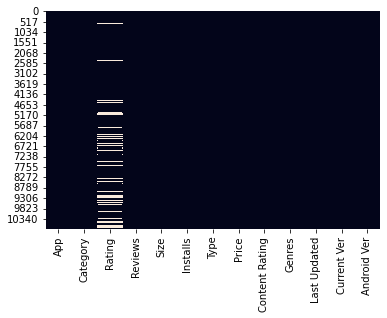

In [10]:
sns.heatmap(df.isnull(),cbar=False)

# Data Cleaning 

We will take mean of rating column and fill the mean values with null values and then round the decimal place to 1 

In [11]:
a=df['Rating'].mean()
df['Rating']=df['Rating'].fillna(a)
df['Rating']=df['Rating'].round(1)
df['Rating'].sample(6)


1141    4.6
8679    4.2
6979    4.1
231     4.7
9925    4.2
4110    4.2
Name: Rating, dtype: float64

In [12]:
df.dropna(inplace=True)

We have 482 duplicated rows we have to drop those

In [13]:
df.duplicated().sum()

483

In [14]:
df.drop_duplicates(inplace=True)

Now, We will perform data cleaning in columns like Reviews,Size,Installs,Price and Ratings  also changed their dtypes  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Review columns has '3.0M' text so removed it  and now i will change the dtype to int 

In [16]:
df=df[df['Reviews'].str.isnumeric()]

In [17]:
df['Reviews']=df['Reviews'].astype('int64')

I will  replace "varies with device" text with 10 because it was occuring most of  time and it occur before 11 so i replaced it with 10 and after that changed the dtype to float 

In [18]:
def get_size(size):
    if size == 'Varies with device':
        return 10
    elif size.endswith('M'):
        size = size[:-1]
        return float(size)
df['Size'] = df['Size'].apply(get_size)

Install column has '+' and ', ' so removed those using regex and changed dtype to int 

In [19]:
df['Installs']=df['Installs'].str.replace(r"[^a-zA-Z\d\_]+","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [20]:
df['Installs']=df['Installs'].astype('int64')

price columns has dollar  so removed it using regex then  c hnaged the dtype to float

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
df['Price']=df['Price'].replace('[^0-9\.-]','',regex=True)

In [23]:
df['Price']=df['Price'].astype(float)

# Cleaned dataset

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Visualizations 

Free apps are more than Paid apps

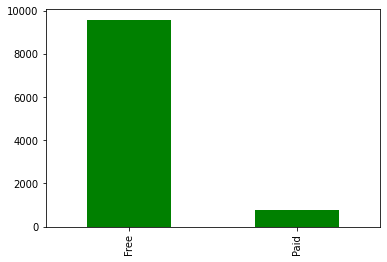

<Figure size 1440x1440 with 0 Axes>

In [25]:
df['Type'].value_counts().plot(kind='bar',color='green',width=0.5)
fig = plt.figure(figsize = (20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


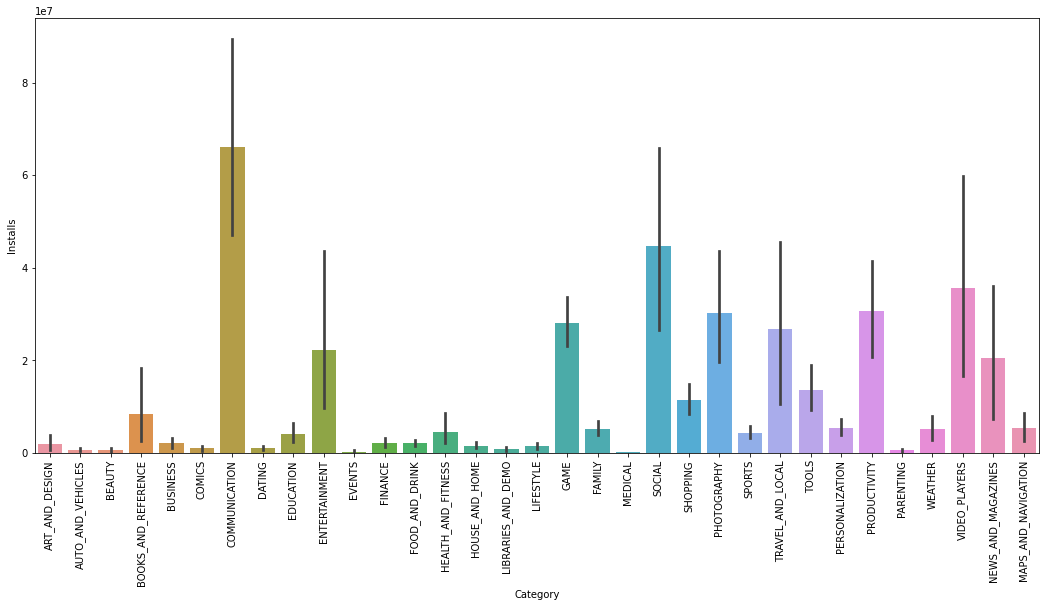

In [26]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation = 90)
sns.barplot('Category','Installs', data = df)


Communication category is most installed category, well  instagram,facebook,whatsapp etc and social category is second most installed category 

In [27]:
communication=df[df['Category']=='COMMUNICATION']

Avg rating in communication category 

In [28]:
communication['Rating'].mean().round(1)

4.2

In [29]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


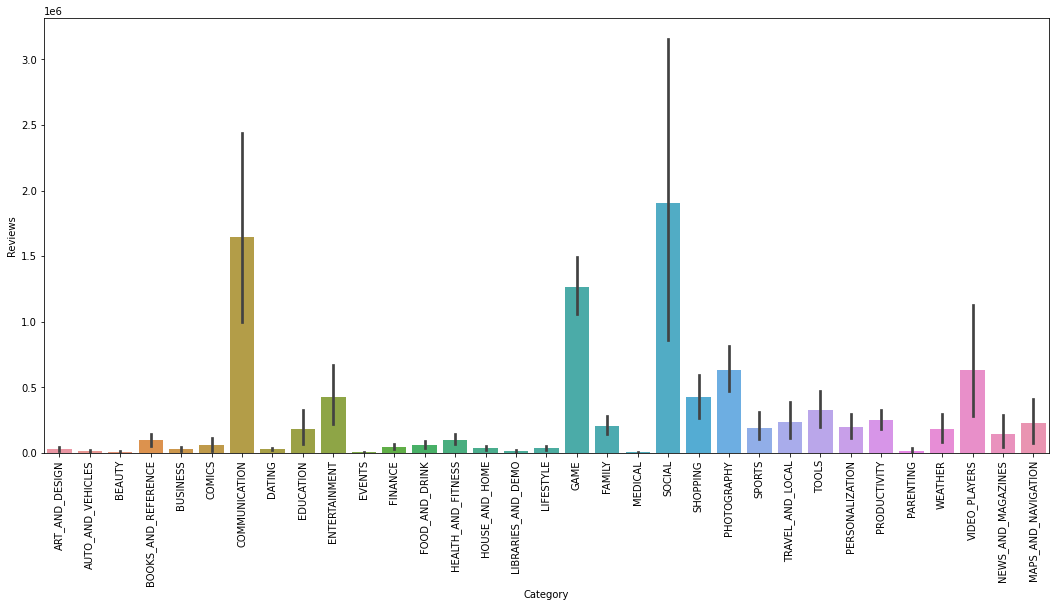

In [30]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Category','Reviews',data=df)

Social has many reviewed and popular apps and communication is the second most reviewed category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


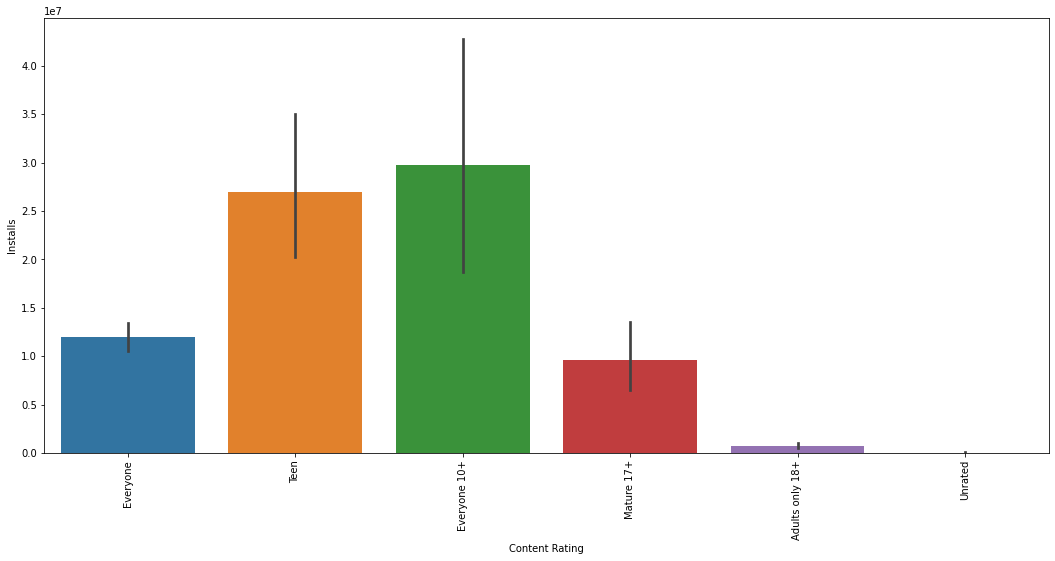

In [32]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Content Rating','Installs',data=df)

Everyone and Teen are most Installed 'Content Rating' column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


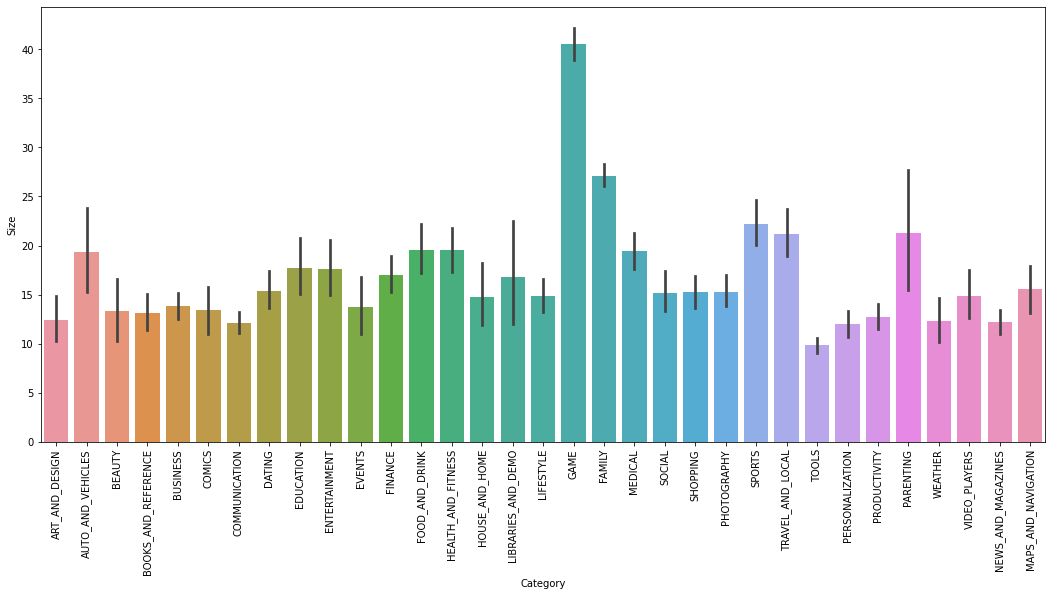

In [31]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Category','Size',data=df)

Game category has largest size apps.Family is second category which has large size apps

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


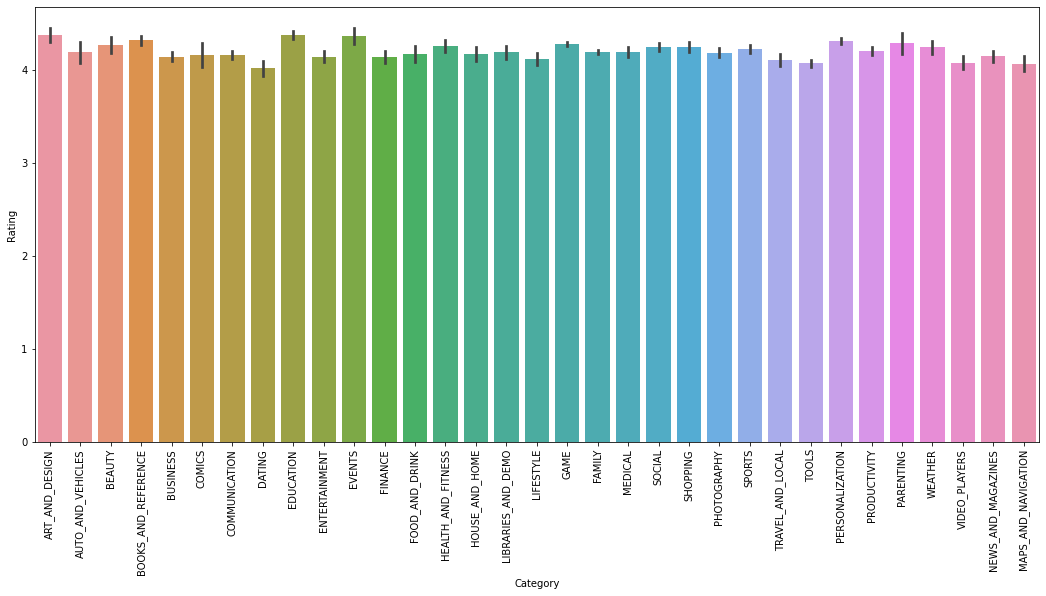

In [33]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot('Category','Rating',data=df)

Mostly all categories are rated equally not much difference i can see 

Let's do some more analysis and take out some insights from the dataset 

Family category is very popular in the playstore dataset 

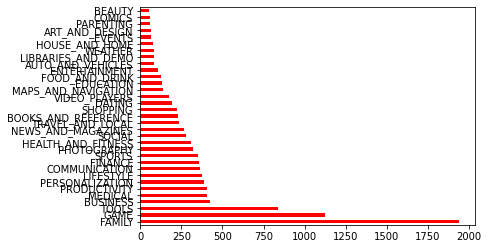

In [34]:
df['Category'].value_counts().plot(kind='barh',color='RED')

In [35]:
family=df[df['Category']=='FAMILY']

Lets see most installed apps in family category 

In [36]:
family[['Installs','App','Category']].sort_values(by='Installs',ascending=False).head(21).reset_index(drop=True)

,Installs,App,Category
0,1000000000,Google Play Games,FAMILY
1,500000000,My Talking Tom,FAMILY
2,500000000,Candy Crush Saga,FAMILY
3,500000000,Pou,FAMILY
4,100000000,Farm Heroes Saga,FAMILY
5,100000000,My Talking Angela,FAMILY
6,100000000,Talking Tom Cat,FAMILY
7,100000000,Tom Loves Angela,FAMILY
8,100000000,Duolingo: Learn Languages Free,FAMILY
9,100000000,Clash Royale,FAMILY


After "family", "game" is the most popular category

In [37]:
game=df[df['Category']=='GAME']

Most Installed games in game category

In [38]:
game[['App','Installs','Category']].sort_values(by='Installs',ascending=False).drop_duplicates().head(20).reset_index(drop=True)

,App,Installs,Category
0,Subway Surfers,1000000000,GAME
1,Pou,500000000,GAME
2,Temple Run 2,500000000,GAME
3,My Talking Tom,500000000,GAME
4,Candy Crush Saga,500000000,GAME
5,Flow Free,100000000,GAME
6,Sniper 3D Gun Shooter: Free Shooting Games - FPS,100000000,GAME
7,Hill Climb Racing,100000000,GAME
8,Angry Birds Rio,100000000,GAME
9,Talking Tom Gold Run,100000000,GAME


Most Installed Apps 

In [39]:
df[['App','Installs','Category']].sort_values(by='Installs',ascending=False).head(11).reset_index(drop=True).drop_duplicates()

,App,Installs,Category
0,WhatsApp Messenger,1000000000,COMMUNICATION
1,Google+,1000000000,SOCIAL
2,Google Street View,1000000000,TRAVEL_AND_LOCAL
3,Google News,1000000000,NEWS_AND_MAGAZINES
4,Maps - Navigate & Explore,1000000000,TRAVEL_AND_LOCAL
5,Instagram,1000000000,SOCIAL
6,Facebook,1000000000,SOCIAL
7,Google Play Games,1000000000,ENTERTAINMENT
8,Google,1000000000,TOOLS
10,Gmail,1000000000,COMMUNICATION


Most reviewed Apps 

In [40]:
df[['App','Reviews','Category']].sort_values(by='Reviews',ascending=False).reset_index(drop=True).head(20).drop_duplicates('App').reset_index(drop=True)

,App,Reviews,Category
0,Facebook,78158306,SOCIAL
1,WhatsApp Messenger,69119316,COMMUNICATION
2,Instagram,66577446,SOCIAL
3,Messenger – Text and Video Chat for Free,56646578,COMMUNICATION
4,Clash of Clans,44893888,GAME
5,Clean Master- Space Cleaner & Antivirus,42916526,TOOLS
6,Subway Surfers,27725352,GAME
7,YouTube,25655305,VIDEO_PLAYERS


Most Expensive and useless apps 

In [41]:
df[['App','Price']].sort_values(by='Price',ascending=False).reset_index(drop=True).head(10)

,App,Price
0,I'm Rich - Trump Edition,400.00
1,I am rich (Most expensive app),399.99
2,I Am Rich Premium,399.99
3,I am rich(premium),399.99
4,most expensive app (H),399.99
5,I am Rich Plus,399.99
6,I Am Rich Pro,399.99
7,I am rich,399.99
8,I am Rich,399.99
9,I AM RICH PRO PLUS,399.99
